 ## Proyecto de presentacion de Inteligencia Artificial

<u>Nombre del Estudiante </u> :  José Araya Prohens     

<u>Rut </u> :  20.444.205 - 3

## Recomendaciones de animes de la plataforma de streaming crunchyroll

<u>**Mi csv**</u>:      
 Es un dataset de los shows disponibles en la plataforma de streaming de pago llamado crunchyroll , este dataset posee más de 1000 filas de datos , estos datos fueron adqueridos del servicio en mayo 2022 de Estados Unidos       [enlace de Kaggle](https://www.kaggle.com/datasets/victorsoeiro/crunchyroll-animes-and-movies?select=titles.csv)     

<u>**Mi propuesta**</u>:    
Analizar los datos de manera que puedas predecir un tiulo recomendado a partir de un genero que te gusta o un titulo que ya viste.  

<u>**Modelo que se piensa implementar**</u>     
 Arboles de Decision   
    
<u>**Objetivo** </u> :           


<u>**Referencias Bibliograficas** </u> :        
Sistema de recomendaciones en base de arbol de decision [enlace](https://cs.emis.de/LNI/Proceedings/Proceedings165/170.pdf)

### Instrucciones del profesor
Estimado alumnos:

Este es un recordatorio para el trabajo de presentacion.

CONDICIONES:
Basado en la busqueda personal anunciada en clases de un dataset a su interes. Debe generar un estudio sobre dicho
dataset. El estudio es de caracter indagatorio, en el cual se evaluaran las siguientes cosas:

1. Uso y manejo de las herramientas de manipulacion de datos (DataFrame) (10%)
2. Propuesta y desarrollo de indicadores estadisticos con algun fin que estime pertinente (20%)
3. Muestra de graficos (con matplotlib BIEN HECHOS) , con el fin de plantear alguna problematica/propuesta u otro, el cual le parece adecuado mostrar. (30%)
4. Uso de algun modelo predictivo aprendido durante el curos, sea, KMeans, algun regresor linea o arboles (otros modelos que usted estudie, son permitidos)(30%)
5. Muestra de resultados, y analisis del modelo encontrando, con foco en su precision predictiva y overfit (si applica) (10%)
NOTA:
Recuerde que puede usar cualquer recurso mostrado en el curso, si usa otro modelo, debe explicar el nuevo modelo. Si
considera necesario usar PCA, HAGALO!

El Profe!

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rich import print
from rich import pretty
%load_ext rich

### Cargando el dataset de Crunchyroll

In [2]:
titulos = pd.read_csv("csv/titles.csv")
creditos = pd.read_csv("csv/credits.csv")

primero vamos a definir que variables importan para este trabajo

In [3]:
titulos = titulos[['title','type','description','release_year','age_certification','runtime','genres','seasons','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']]
titulos['genres'] = titulos['genres'].str.replace('[','',regex=True).replace(']','',regex=True).replace("'",'',regex=True)
titulos['title'] = titulos['title'].str.capitalize()
titulos.head()

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Lupin the third,SHOW,Arsene Lupin III is the grandson of the master...,1971,TV-14,23,"scifi, animation, action, comedy, crime",6.0,7.9,2116.0,45.829,8.0
1,Mobile suit gundam,SHOW,Mobile Suit Gundam is a televised anime series...,1979,TV-Y7,25,"scifi, war, animation, action, drama, fantasy",1.0,7.9,2281.0,41.250,8.1
2,Galaxy express 999,SHOW,Galaxy Express 999 is a manga written and draw...,1978,TV-PG,24,"scifi, action, drama, animation",1.0,7.8,459.0,5.064,8.3
3,Lupin the 3rd,SHOW,The master thief Lupin III and his cronies con...,1977,TV-14,24,"scifi, animation, action, comedy, crime, fantasy",4.0,8.0,1738.0,0.600,NaN
4,Chōdenji machine voltes v,SHOW,Chōdenji Machine Voltes V is a Japanese anime ...,1977,TV-PG,24,"drama, action, scifi, animation",1.0,8.1,207.0,12.625,7.3


### Descripcion  e informacion del dataset

In [4]:
titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1081 non-null   object 
 1   type               1081 non-null   object 
 2   description        1050 non-null   object 
 3   release_year       1081 non-null   int64  
 4   age_certification  750 non-null    object 
 5   runtime            1081 non-null   int64  
 6   genres             1081 non-null   object 
 7   seasons            1080 non-null   float64
 8   imdb_score         907 non-null    float64
 9   imdb_votes         907 non-null    float64
 10  tmdb_popularity    1068 non-null   float64
 11  tmdb_score         1006 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 101.5+ KB


tenemos 1081 filas de datos 

In [5]:
titulos.shape

(1081, 12)

In [6]:
titulos.size

12972

### Cantidad de Animes por genero en la plataforma de Crunchyroll

In [7]:
unique_genres = [val.strip() for sublist in titulos.genres.dropna().str.split(",").tolist() for val in sublist]

In [8]:
genres_summary = pd.DataFrame(unique_genres,columns=['genres']).value_counts().reset_index().rename(columns={0:'count'})
#Eliminamos la categoria animacion y la categoria vacia ya que estas no son importantes a la hora de graficarlo
genres_summary = genres_summary.drop(0) 
genres_summary = genres_summary.drop(15) 

Cantidad de animes por genero

In [9]:
genres_summary

,genres,count
1,comedy,567
2,scifi,472
3,action,463
4,drama,395
5,fantasy,353
6,romance,253
7,thriller,90
8,sport,55
9,horror,49
10,family,35


grafica de la cantidad de animes que tiene cada genero en la plataforma de crunchyroll

<AxesSubplot:xlabel='count', ylabel='genres'>

<Figure size 432x288 with 1 Axes>

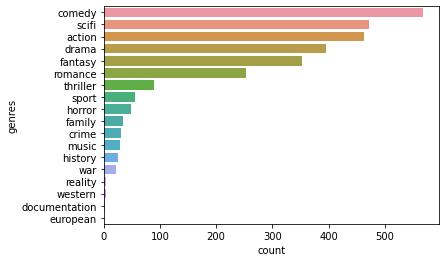

In [10]:
ax = sns.barplot(x="count", y="genres", data=genres_summary)
ax


### Cantidad de animes por año de estreno


In [11]:
releaseYearSum = pd.DataFrame(titulos,columns=['release_year']).value_counts().reset_index().rename(columns={0:'count'} )
releaseYearSum  = releaseYearSum.sort_values(by = 'release_year' , ascending=False).reset_index()
releaseYearSum = releaseYearSum.drop(columns=['index'])


<AxesSubplot:xlabel='release_year', ylabel='count'>

<Figure size 432x288 with 1 Axes>

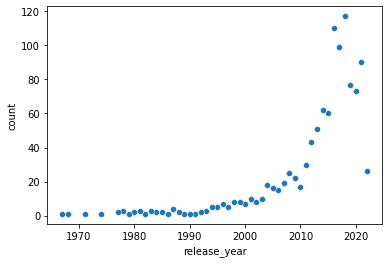

In [12]:
sns.scatterplot(x='release_year',y ='count', data=releaseYearSum)

### Cantidad de animes por clasificacion de edad

In [13]:
titulos['age_certification'].value_counts()

TV-14    482
TV-MA    126
TV-PG    114
TV-G      13
TV-Y7     12
TV-Y       2
PG-13      1
Name: age_certification, dtype: int64

In [14]:
age_summary = pd.DataFrame(titulos,columns=['age_certification']).value_counts().reset_index().rename(columns={0:'count'})
age_summary


,age_certification,count
0,TV-14,482
1,TV-MA,126
2,TV-PG,114
3,TV-G,13
4,TV-Y7,12
5,TV-Y,2
6,PG-13,1


Grafico de barras sobre la cantidad de animes por clasificacion de edad

<AxesSubplot:xlabel='count', ylabel='age_certification'>

<Figure size 432x288 with 1 Axes>

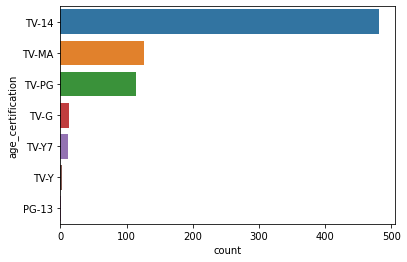

In [15]:
ax = sns.barplot(x="count", y="age_certification", data=age_summary)
ax

### Promedio entre puntuacion de imdb  y puntuacion de Tmdb (The Movie database)


In [16]:
datosDistr = pd.DataFrame({'titulos':titulos['title'], 'tmdb':titulos['tmdb_score'],'imdb':titulos['imdb_score']})
datosDistr['tmdb'] = datosDistr['tmdb'].fillna(datosDistr['imdb'])
datosDistr.head()

,titulos,tmdb,imdb
0,Lupin the third,8.0,7.9
1,Mobile suit gundam,8.1,7.9
2,Galaxy express 999,8.3,7.8
3,Lupin the 3rd,8.0,8.0
4,Chōdenji machine voltes v,7.3,8.1


In [17]:
datosDistr['promedio'] = (datosDistr['tmdb'] + datosDistr['imdb']) / 2

datosDistr.head()

,titulos,tmdb,imdb,promedio
0,Lupin the third,8.0,7.9,7.95
1,Mobile suit gundam,8.1,7.9,8.00
2,Galaxy express 999,8.3,7.8,8.05
3,Lupin the 3rd,8.0,8.0,8.00
4,Chōdenji machine voltes v,7.3,8.1,7.70


Text(0.5, 1.0, 'Distribucion de Popularidad y  puntuacion de The movie Database')

<Figure size 216x276.48 with 1 Axes>

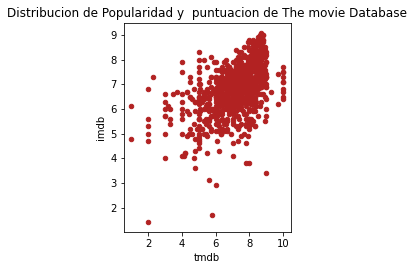

In [18]:
fig, ax = plt.subplots(figsize=(3, 3.84))
datosDistr.plot(x = 'tmdb',y='imdb',c='firebrick',kind='scatter',ax = ax)
ax.set_title('Distribucion de Popularidad y  puntuacion de The movie Database')

In [19]:
titulos.sort_values(by='imdb_score', ascending = False).dropna()

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
83,Fullmetal alchemist: brotherhood,SHOW,Edward and Alphonse Elric's reckless disregard...,2009,TV-14,29,"scifi, action, animation, comedy, drama, fantasy",1.0,9.1,156503.0,110.534,8.7
243,Hunter x hunter,SHOW,Twelve-year-old Gon Freecss one day discovers ...,2011,TV-14,23,"drama, action, comedy, crime, animation, docum...",3.0,9.0,87857.0,117.924,8.8
965,Spy x family,SHOW,Master spy Twilight is the best at what he doe...,2022,TV-14,24,"action, comedy, drama, thriller, animation",1.0,9.0,5847.0,1199.380,8.8
316,Attack on titan,SHOW,"Several hundred years ago, humans were nearly ...",2013,TV-MA,24,"scifi, action, drama, fantasy, horror, animation",4.0,9.0,325381.0,139.388,8.6
85,Death note,SHOW,Light Yagami is an ace student with great pros...,2006,TV-14,24,"scifi, animation, crime, drama, fantasy, thriller",1.0,9.0,302147.0,104.037,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
589,Rainy cocoa,SHOW,Aoi’s soaked by a sudden rainstorm and takes s...,2015,TV-PG,2,"animation, comedy",5.0,3.6,60.0,4.467,4.8
743,Tsukipro the animation,SHOW,"SOARA, Growth, SolidS, and QUELL are four grou...",2017,TV-PG,24,"comedy, animation, music",2.0,3.4,11.0,6.920,9.0
763,Hand shakers,SHOW,"Tazuna is a high school student, living in Osa...",2017,TV-14,23,"action, scifi, animation",1.0,3.1,185.0,13.014,5.6
1060,Ex-arm,SHOW,2014: Akira Natsume seems to almost have a pho...,2021,TV-14,23,"scifi, animation, action, crime, romance",1.0,1.7,750.0,16.550,5.8


### Filtros para los generos

Para poder filtrar facilmente los titulos se crearon estas dos funciones 
1. multicontainsFun para poder filtrar en titulos que tengan varios generos solo si tambien contiene el buscado

2. solocontainsFun para poder filtrar en titulos que solo tengan el genero que se busca

In [20]:
#Para filtrar
def multicontainsFun(tipoStr = "" , column = 'genres'):
   return titulos[titulos[column].str.contains(tipoStr)]

def solocontainsFun(tipoStr = "", column = 'genres'):
   return titulos[titulos[column] == tipoStr]



In [21]:
multicontainsFun(tipoStr='action', column='genres').sort_values(by="tmdb_popularity" ,ascending = False)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
965,Spy x family,SHOW,Master spy Twilight is the best at what he doe...,2022,TV-14,24,"action, comedy, drama, thriller, animation",1.0,9.0,5847.0,1199.380,8.8
432,Dragon ball super,SHOW,"With Majin Boo defeated half-a-year prior, pea...",2015,TV-14,23,"action, scifi, comedy, animation, thriller, dr...",5.0,8.4,28567.0,423.650,8.2
12,Dragon ball z,SHOW,Dragon Ball Z is a Japanese animated televisio...,1989,TV-PG,24,"scifi, action, animation, comedy, fantasy, thr...",16.0,8.8,125554.0,389.990,8.2
86,Naruto,SHOW,"In another world, ninja are the ultimate power...",2002,TV-PG,23,"scifi, comedy, animation, action, fantasy, thr...",6.0,8.4,93980.0,362.730,8.4
84,Naruto shippūden,SHOW,Naruto Shippuuden is the continuation of the o...,2007,TV-14,23,"scifi, action, animation, comedy, drama, fantasy",24.0,8.7,115863.0,350.688,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...
869,Akudama drive,SHOW,"Long ago, a war broke out in Japan that pitted...",2020,TV-MA,23,"animation, action, scifi",1.0,7.4,1743.0,NaN,NaN
937,Gibiate,SHOW,"A disease called ""Gibia"" has infected the worl...",2020,NaN,23,"action, fantasy, animation",1.0,4.2,172.0,NaN,NaN
989,Mushoku tensei: jobless reincarnation,SHOW,A 34-year-old Japanese NEET is run over by a s...,2021,TV-MA,23,"drama, fantasy, animation, action",1.0,8.4,8436.0,NaN,NaN
997,Rust-eater bisco,SHOW,In a world where mushrooms have decimated the ...,2022,TV-14,23,"scifi, animation, action, fantasy",1.0,7.0,581.0,NaN,NaN


### Filtro para la clasificacion de edad

### Filtro para clasificar por Año de estreno

In [53]:

#Para filtro solo
def filtroYear(year = "" ,fromD = ""):
    inst = "Instruccions : \n year -> is the year (int) you want titles from  \n fromD -> options are 'before' or 'after' "
    try:
        if fromD == 'before':
             return titulos[titulos['release_year'] < int(year)].sort_values(by='release_year', ascending = False)
        elif fromD == 'after':
             return titulos[titulos['release_year'] >= int(year)].sort_values(by='release_year', ascending = True)
        else:
            return print(f"please Try Again with correct values !! \n {inst}")
    except Exception as e:
        return print(f"Error : \n {e} \n {inst}")
    
#Para filtro dentro de un filtro
def mdfiltroYear(year = "" ,fromD = "" , data= ""):
    inst = "Instruccions : \n year -> is the year (int) you want titles from  \n fromD -> options are 'before' or 'after' "
    try:
        if fromD == 'before':
             return data[data['release_year'] < int(year)].sort_values(by='release_year', ascending = False)
        elif fromD == 'after':
             return data[data['release_year'] >= int(year)].sort_values(by='release_year', ascending = True)
        else:
            return print(f"please Try Again with correct values !! \n {inst}")
    except Exception as e:
        return print(f"Error : \n {e} \n {inst}")

In [54]:
filtroYear(year= "2017" , fromD="after").head(4)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
599,Black clover,SHOW,Asta and Yuno were abandoned together at the s...,2017,TV-14,23,"drama, fantasy, scifi, thriller, animation, ac...",4.0,8.3,19970.0,82.964,8.5
690,Clockwork planet,SHOW,"One day, a black box suddenly crashed into the...",2017,TV-14,24,"scifi, animation, fantasy",1.0,5.3,174.0,13.397,7.2
689,Juni taisen: zodiac war,SHOW,The 12th Twelve Tournament that gets held ever...,2017,TV-14,23,"action, animation, fantasy",1.0,6.6,776.0,15.877,7.9
766,Chiruran 1/2,SHOW,"Strong, intense, and cute! The most laid-back ...",2017,NaN,2,"action, comedy, history, animation",1.0,4.0,7.0,4.147,4.7


In [39]:
filtroYear(year= "2017" , fromD="before").head(4)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
598,Kiitaro's yokai picture diary,SHOW,Kiitarou is a boy with a strong sixth sense wh...,2016,NaN,4,scifi,3.0,NaN,NaN,4.577,6.4
455,Ace attorney,SHOW,A rookie lawyer Ryuuichi Naruhodou stands up t...,2016,TV-14,24,"thriller, animation, drama, comedy, crime",2.0,6.4,380.0,15.064,7.3
508,New game!,SHOW,"After graduating high school, Suzukaze Aoba jo...",2016,TV-14,23,"comedy, animation, drama",2.0,7.2,807.0,9.298,7.2
509,Bananya,SHOW,Bananya is a series about the secret life of k...,2016,TV-G,3,"animation, comedy, family",2.0,6.2,156.0,10.088,6.5


### Probando filtros multiples

In [58]:
# Este ejemplo muestra un filtro de un filtro en este caso los titulos que contienen accion dentro del filtro titulos despues del año 2017
data = pd.DataFrame( multicontainsFun(tipoStr='action', column='genres'))
mdfiltroYear(year= "2017" , fromD="after",data=data).head()


,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
599,Black clover,SHOW,Asta and Yuno were abandoned together at the s...,2017,TV-14,23,"drama, fantasy, scifi, thriller, animation, ac...",4.0,8.3,19970.0,82.964,8.5
694,Magical circle guruguru,SHOW,The seal that for hundreds of years had confin...,2017,TV-14,24,"action, animation",2.0,7.2,12.0,2.803,8.0
689,Juni taisen: zodiac war,SHOW,The 12th Twelve Tournament that gets held ever...,2017,TV-14,23,"action, animation, fantasy",1.0,6.6,776.0,15.877,7.9
741,Chronos ruler,SHOW,"The story centers on ""Chronos Rulers,"" those w...",2017,TV-14,23,"action, scifi, animation",1.0,5.9,43.0,3.260,6.8
678,Saiyuki reload blast,SHOW,"Humans and yokai, science and magic... all exi...",2017,TV-14,23,"scifi, drama, animation, action, comedy",1.0,7.7,102.0,7.632,8.5


In [62]:
# Este ejemplo muestra un filtro de un filtro en este caso los titulos que contienen solo el genero de accion dentro del filtro titulos despues del año 2017
data = solocontainsFun(tipoStr='action', column='genres')
print("Este ejemplo muestra un filtro de un filtro en este caso solo los titulos que contienen \n como unico el genero de accion dentro del filtro titulos despues del año 2017")
mdfiltroYear(year= "2017" , fromD="after",data=data).head()

Este ejemplo muestra un filtro de un filtro en este caso solo los titulos que contienen 
 como unico el genero de accion dentro del filtro titulos despues del año 2017

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
801,Ikemen sengoku: toki wo kakeru ga koi wa hajim...,SHOW,NaN,2017,NaN,3,action,1.0,NaN,NaN,1.280,8.0
725,Bakumatsu,SHOW,"Kyoto, Japan. The heroine meets a man who give...",2018,NaN,24,action,2.0,NaN,NaN,6.656,9.2
878,Final fantasy xv: episode ardyn -prologue-,SHOW,NaN,2019,NaN,13,action,1.0,NaN,NaN,3.226,10.0
918,Katana maidens ~ mini toji,SHOW,Does the girls' daily life include fighting an...,2019,NaN,3,action,1.0,NaN,NaN,0.752,9.0
840,Yashahime: princess half-demon,SHOW,The daughters of Sesshoumaru and Inuyasha set ...,2020,TV-14,24,action,2.0,NaN,NaN,68.223,7.6


### Usando Funcion para buscar un titulo

In [26]:
#Para buscar un titulo
def buscarTitulo(titulo = "Gintama"):
    funtitle = titulos['title'].str.contains(titulo)
    return titulos[funtitle]

In [27]:

buscarTitulo(titulo='Spy')

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
965,Spy x family,SHOW,Master spy Twilight is the best at what he doe...,2022,TV-14,24,"action, comedy, drama, thriller, animation",1.0,9.0,5847.0,1199.38,8.8


In [28]:
buscarTitulo(titulo='Spy').iloc[0,2]

"Master spy Twilight is the best at what he does when it comes to going undercover on dangerous missions in the name of a better world. But when he receives the ultimate impossible assignment—get married and have a kid—he may finally be in over his head!\n\nNot one to depend on others, Twilight has his work cut out for him procuring both a wife and a child for his mission to infiltrate an elite private school. What he doesn't know is that the wife he's chosen is an assassin and the child he's adopted is a telepath!"

### Requerimientos para poder lograr el objetivo

1. Poder filtrar entre generos
2. Identificar y comparar con popularidad
3. filtrar por clasificacion de edad



### Ejemplo de un caso manual de lo que Quiero lograr :

<u>Mi perfil </u>:
tengo 22 años

<u>Caso 1 </u>:
yo vi spy x familiy  y me gusto ->  
* genero = action , comedia , drama y thriller -> "Generos que me gustan porque la serie me gusta"
* tmdb_score = 8.8  -> "es una puntuacion alta"
* imdb_score = 9.0  -> "es una puntuacion alta"
* tmdb_popularity = 1200
* age_certification = TV-14 -> "recomendacion para 14 años o más"
* seasons = 1.0 -> "Solo tiene 1 temporada"
* runtime = 24 -> "solo tendra 24 episodios (actualmente)"

<u>Caso 2 </u>:
yo vi jujutsu kaisen  y me gusto ->  
* genero = scifi ,action , fantasy y thriller -> "Generos que me gustan porque la serie me gusta"
* tmdb_score = 8.5  -> "es una puntuacion alta"
* imdb_score = 8.6  -> "es una puntuacion alta"
* tmdb_popularity = 303
* age_certification = TV-MA -> "apta solo para mayores"
* seasons = 1.0 -> "Solo tiene 1 temporada"
* runtime = 24 -> "solo tendra 24 episodios (actualmente)"

<u>Caso 3 </u>:
yo vi gintama  y me gusto ->  
* genero = action ,comedy y scifi -> "Generos que me gustan porque la serie me gusta"
* tmdb_score = 7.9  -> "es el mas bajo de los tres casos pero mayor que 6.5"
* imdb_score = 8.7  -> "es una puntuacion alta"
* tmdb_popularity = 68.218
* age_certification = TV-14 -> "apta solo para mayores"
* seasons = 12.0 -> "Solo tiene 12 temporada"
* runtime = 24 -> "24 episodios por temporada "

<u>Diagrama de venn de los generos </u> :       

<img src="assets/diagramavennIA.svg" style="width:550px ;">

1. la interseccion entre los tres es la accion.
2. los generos en comun entre "Spy x Family" y "Jujutsu Kaisen" es el genero de Thriller.
3. los generos en comun entre "Spy x Family" y "Gintama" es el genero de comedia.
4. los generos en comun entre "Jujustu Kaisen" y "Gintama" es el genero del Scifi o Ciencia ficcion.
5. el complemento de "Spy x Family" es genero de drama.
6. el complemento de "Jujustu Kaisen" es genero de fantasia.




                            

### Aplicando Modelo

In [29]:
from sklearn import tree

In [30]:
model = tree.DecisionTreeClassifier()